<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/statistics/stats_statistical_thinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disclaimer

* Content of this notebook is for my personal learning. 
* I currently use a repository of Python notebooks as my knowledge management system, it is like some people use note taking apps with the added benefit of interactivity and ability to programatically play with the concepts, ideas and data in order to deepen the understanding and strengthen the recall.  
* Any opinions or ideas expressed here are on my own behalf.
* Note: This notebook is created from the template `knowledge_notebook_template.ipynb`. For convenience it inherits all potentially useful imports, helper utils and general structure. That means it is likely not using all the defined functionality.
* Content starts from the section [Header](#cell-header).


## Code Set Up

In [ ]:
#@title Imports {display-mode: "form"}
import sys
import os
import platform
import random
import itertools
import math
import datetime

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# reading google sheets files
import gspread
from oauth2client.client import GoogleCredentials

from collections import OrderedDict
from typing import List, Optional

# print versions
print (f"system: {sys.version}")
print (f"pandas: {pd.__version__}")
print (f"numpy: {np.__version__}")

system: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas: 1.1.5
numpy: 1.19.5


In [ ]:
# @title Dislay settings  {display-mode: "form"} 
sns.set(context='notebook', style="whitegrid", rc={"figure.figsize": (20, 10)})
pd.set_option("display.float_format", '{:.3f}'.format)
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", 200)

### Helper functions and snippets

Note: This notebook is created from the template `knowledge_notebook_template.ipynb`. For convenience it inherits all potentially useful imports, helper utils and general structure. That means it is likely not using all the defined functionality.

In [ ]:
# @title Generate Report header with meta information {display-mode: "form"} 
def generate_header(author: Optional[str] = 'szczecinski',
                    title: Optional[str] = 'unknown',
                    description: Optional[str] = 'unknown',
                    prepared_for: Optional[str] = 'learning',
                    tags: Optional[List[str]] = [''],
                    links: Optional[List[str]] = ['']):
    """
    Generates standardised header with meta information describing the report.
    
    Args:
      author: Name of the author.
      title: Title of the report.
      description: Text describing the report.
      prepared_for: Text providing context and purpose of generating the report.
      tags: List of tags for searching.
      links: List of links for reference and cross linking.

    Returns:
      df_meta: Formatted Pandas Dataframe with meta information of the report.
    """
    meta_dict = OrderedDict()

    # Properties provided by author.
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)
    meta_dict['links'] = str(links)

    # Properties auto generated by the system.
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['report_information']).T
    return df_meta

In [ ]:
# @title Using R  {display-mode: "form"} 
# loading in case want to write R code
%load_ext rpy2.ipython
# example R code

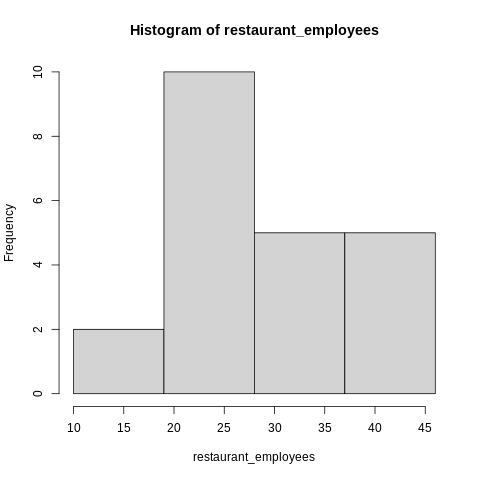

In [ ]:
%%R
restaurant_employees <- c(22, 35, 15, 26, 40, 28, 18, 20, 25, 34, 39, 42, 24, 22, 19, 27, 22, 34, 40, 20, 38, 28)
hist(restaurant_employees, breaks=c(10,19,28,37,46), right=FALSE)

#### Loading data from gsheet

In [ ]:
# @title Google Authentication {display-mode: "form"}
from google.colab import auth
auth.authenticate_user()

In [ ]:
# @title {display-mode: "form"} 
# importing data from google sheet
def get_data_gsheet(name='data_jobs_summary'):
  gc = gspread.authorize(GoogleCredentials.get_application_default())
  worksheet = gc.open(name).sheet1
  # get_all_values gives a list of rows.
  rows = worksheet.get_all_values()
  header = rows[0]
  df_data = pd.DataFrame.from_records(data=rows[1:], columns=header)
  return df_data

# df = get_data_gsheet()

In [ ]:
# @title {display-mode: "form"} 
def generate_header(author='unknown', title='unknown', description ='unknown', prepared_for='unknown', tags=''):
    """
    desc: generates standard header with meta information describing report
    input: author, title, description, prepared_for, tags
    output: rendering formatted dataframe with report details
    """
    meta_dict = OrderedDict()

    # properties to fill
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)

    # auto generated
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['meta_information']).T
    return df_meta

<a name="cell-header"></a>
# Header: Title and metadata

In [ ]:
# setting up header info
author = 'Michal Szczecinski'
prepared_for ='Studying statistics.'
title = 'stats-bites#1'
description = 'Presentation of basis concepts from stats in intuitive manner.'
tags = ['#data-driven', '#math', '#stats']
links = ['']
generate_header(author=author,
                title=title,
                description=description,
                prepared_for=prepared_for,
                tags=tags,
                links=links)

,report_information
author,Michal Szczecinski
title,stats-bites#1
description,Presentation of basis concepts from stats in intuitive manner.
prepared_for,Studying statistics.
tags,"['#data-driven', '#math', '#stats']"
links,['']
runtime,2021-09-30 12:53:33
path,/content
python_version,3.7.12
pandas_version,1.1.5


### What is the role of Statistics and Probability in Machine Learning?

#### Uncertainty in Machine learning
1. **Noise in observations**
  - An observation from the domain is often referred to as an instance or an example. It is one row of data. 
  - It is what was measured or what was collected that describes the object or subject.
  - It is the input to a model and the expected output.
  - Noise refers to variability in the observation. Variability could be natural, such as a larger or smaller flower than normal. It could also be an error, such as a slip when measuring,  problem with a measuring device or a typo when writing it down.
  - This variability impacts not just the inputs or measurements but also
the outputs; for example, an observation could have an incorrect class label.
  - This means that although we have observations for the domain, we must expect some variability or randomness. 
  - The real world, and in turn, real data, is messy or imperfect. As practitioners, we must remain skeptical of the data and develop systems to expect and even harness this uncertainty.
  - This is why so much time is spent on reviewing statistics of data and creating visualizations to help identify those aberrant or unusual cases: so-called data cleaning.
2. **Incomplete Coverage of the Domain**
  - Observations from a domain used to train a model are a sample and incomplete by definition.
  - In statistics, a random sample refers to a collection of observations chosen from the domain without systematic bias (e.g. uniformly random).
  - Nevertheless, there will always be some limitation that will introduce bias.
  - For example, we might choose to measure the size of randomly selected
flowers in one garden. The flowers are randomly selected, but the scope is limited to one garden.
  - Scope can be increased to gardens in one city, across a country, across a continent, and so on.
  - An appropriate level of variance and bias in the sample is required such that the sample is representative of the task or project for which the data or model will be used.
  - We aim to collect or obtain a suitably representative random sample of observations to train and evaluate a machine learning model.
  - Often, we have little control over the sampling process. Instead, we
  access a database or CSV file and the data we have is the data we must work with.
  - In all cases, we will never have all of the observations. If we did, a predictive model would not be required.
  This means that there will always be some unobserved cases. There will be part of the problem
  domain for which we do not have coverage. No matter how well we encourage our models to
  generalize, we can only hope that we can cover the cases in the training dataset and the salient
  cases that are not.
  This is why we split a dataset into train and test sets or use resampling methods like k-fold
  cross-validation. We do this to handle the uncertainty in the representativeness of our dataset
  and estimate the performance of a modeling procedure on data not used in that procedure.
3. **Imperfect model of the Problem**

  >All models are wrong but some are useful
  >--George Box

  - A machine learning model will always have some error.
  - This does not apply just to the model, the artifact, but the whole procedure used to prepare it, including the choice and preparation of data, choice of training hyperparameters, and the interpretation of model predictions.
  -  Model error could mean imperfect predictions, such as
predicting a quantity in a regression problem that is quite different to what was expected, or predicting a class label that does not match what would be expected.
  - Nevertheless, predictions are required. Given we know that the models will make errors, we handle this uncertainty by seeking a model that is good enough. This often is interpreted as selecting a model that is skillful as compared to a naive method or other established learning
  models, e.g. good relative performance.
  - Another type of error is an error of omission. We leave out details or abstract them in order to generalize to new cases. This is achieved by selecting models that are simpler but more robust to the specifics of the data, as opposed to complex models that may be highly specialized
to the training data.
  - As such, we might and often do choose a model known to make errors on the training dataset with the expectation that the model will generalize better to new cases and have better overall performance. [3]


### How to manage uncertainty
The methods and tools from probability provide the foundation and way of thinking about the random or stochastic nature of the predictive modelling problems addressed with machine learning; for example:

* In terms of noisy observations - probability and statistics help us to understand and quantify the expected value and variability of variables in our observations from the domain.
* In terms of the incomplete coverage of the domain - probability helps to understand and quantify the expected distribution and density of observations in the domain.
* In terms of model error - probability helps to understand and quantify the expected capability and variance in performance of our predictive models when applied to new data.

The procedures we use in applied machine learning are carefully chosen to address the sources of uncertainty, but understanding why the procedures were chosen requires a basic understanding of probability and probability theory. [3]

## Configuration
Defining variables and parameters used in the notebook


## Statistical Thinking

### What is statistics?

Statistics is science of learning from data. World is full of uncertainty. Statistics goal is to model that uncertainty. To answer complex questions with numerical results that are easy to interpret. 


### Population vs sample

Population - all individuals, objects, or measurements whose properties are studied. 
Sample - a subset of the population studied.

| Population                                                                                    | Sample                                                  |
|-----------------------------------------------------------------------------------------------|---------------------------------------------------------|
| It contains all members of a specified group.                                                 | It is a subset that represents the entire population.   |
| It is a complete set: all individuals, objects, or measurements whose properties are studied. | It is a subset of the population studied.               |
| Reports are true representation of opinion.                                                   | Reports have a margin of error and confidence interval. |
| The measurable quality is called a parameter.                                                 | The measurable quality is called a statistic.           |

### Examples of Populations vs samples

|                   Population                  |                                                   Sample                                                  |
|:---------------------------------------------:|:---------------------------------------------------------------------------------------------------------:|
| Advertisements for IT jobs in the Netherlands | The top 50 search results for advertisements for IT jobs in the Netherlands on May 1, 2020                |
| Songs from the Eurovision Song Contest        | Winning songs from the Eurovision Song Contest that were performed in English                             |
| Undergraduate students in the Netherlands     | 300 undergraduate students from three Dutch universities who volunteer for your psychology research study |
| All countries of the world                    | Countries with published data available on birth rates and GDP since 2000                                 |

Questions: 

1. **What if you want to study the population of people who play your game? Who does the population consist of?**

  Perhaps it depends on the goal of the study. Suppose our goal is to report on the past activity of all players. In that case, we could consider a population consisting of all the players who have played it so far. We could use the data directly from our database. In this case, there is no need to use methods for dealing with samples because we are presumably dealing with all complete data. 

2. **What if we are interested in the future potential of our game?**

  It is possible that our game has been exposed to a fraction of the relevant market, and the "population" of people who are likely to play our game is much larger. We might not be able to directly generalize our analysis and statements based on the existing data when applied to this broader scope.

3. **What if we want to test how much players will like a particular new feature?**

  In this case, we are likely to perform an A/B test with a selected subset of the users. We do not want to launch it to a whole user base, in case it will have a negative impact on the game. Instead, we try to select a representative sample and do a controlled experiment, which results we would like to consider in the context of future impact on the whole population of players.

### Types of Samples

1. Simple random sampling
2. Systematic Samples
3. Stratified Samples
4. Cluster Samples
5. Convenience Samples
[2]

|          Type          |                                                                                                                                             Description                                                                                                                                             |
|:----------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| Simple Random Sampling | The most basic sampling method is called a simple random sample. Any group of n individuals is equally likely to be chosen as any other group of n individuals if the simple random sampling technique is used. In other words, each sample of the same size has an equal chance of being selected. |
| Systematic Samples     | To choose a systematic sample, randomly select a starting point and take every nth oiece of data from listing of the population. For example, suppose you want to do a phone survey. Your phone book contains 20,000 residence listings. You must choose                                            |
| Stratified Samples     |To choose a stratified sample, divide the population into groups called strata and then take a proportionate number from each stratum. For example, you could stratify (group)                                                                                                                                                                                                                                                                                                     |
| Cluster Samples        |                                                                                                                                                                                                                                                                                                     |
| Convenience Samples    |                                                                                                                                                                                                                                                                                                     |

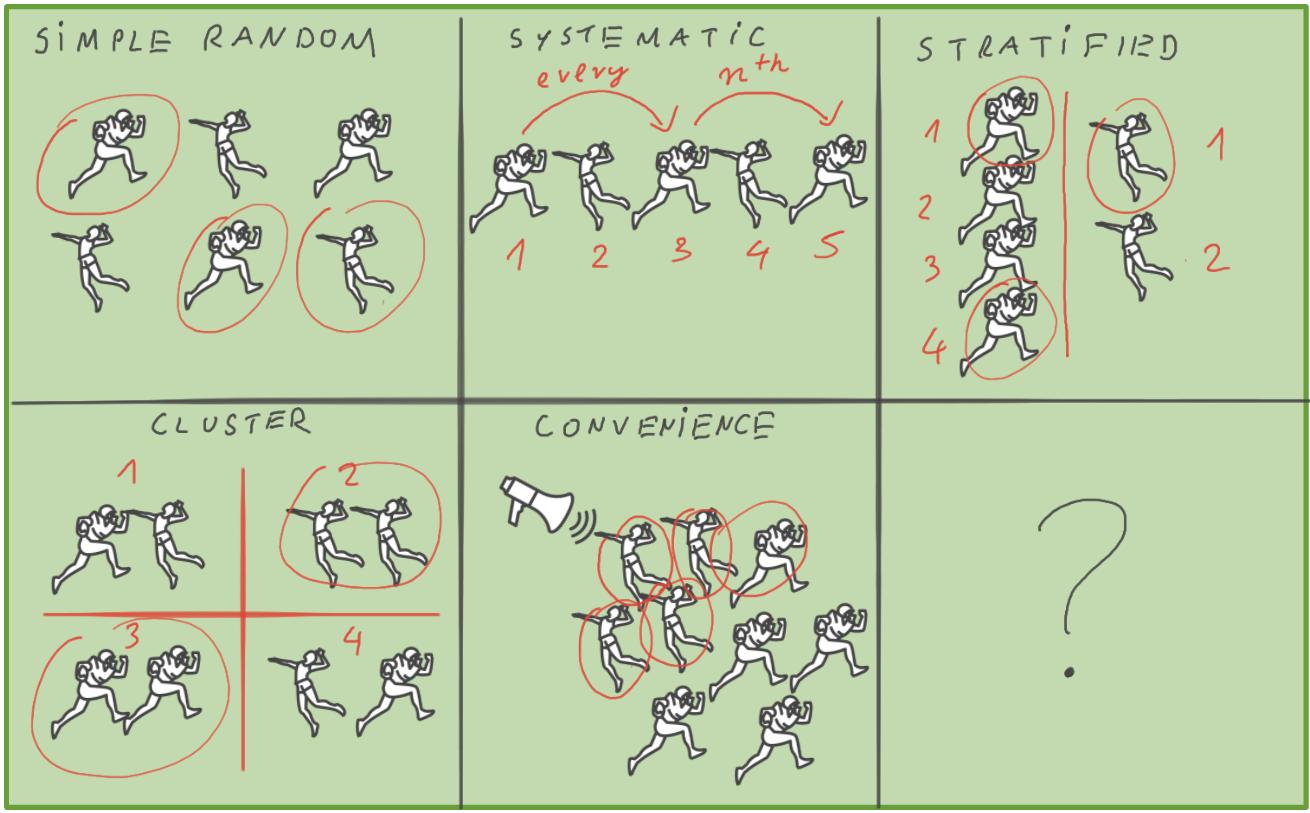

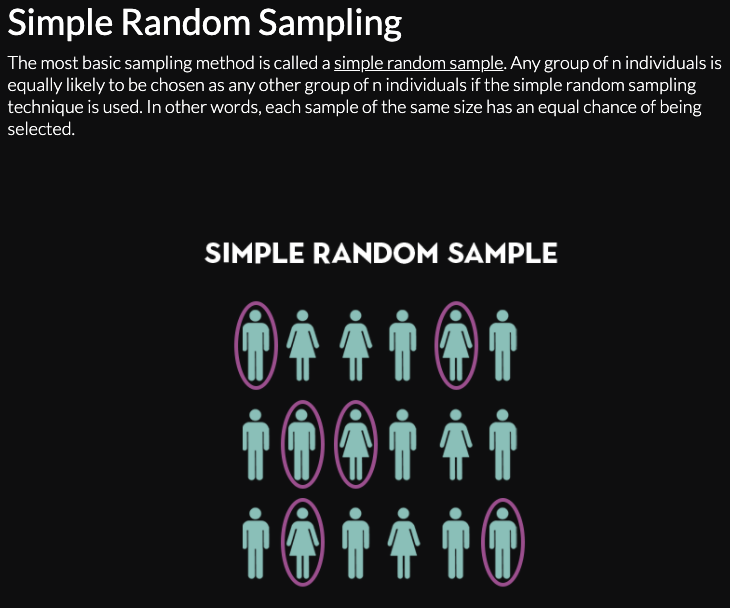

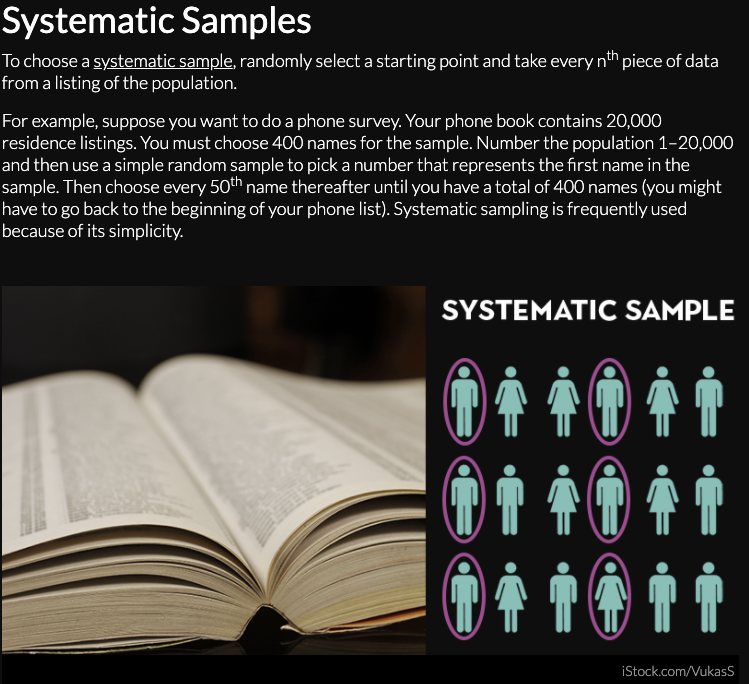

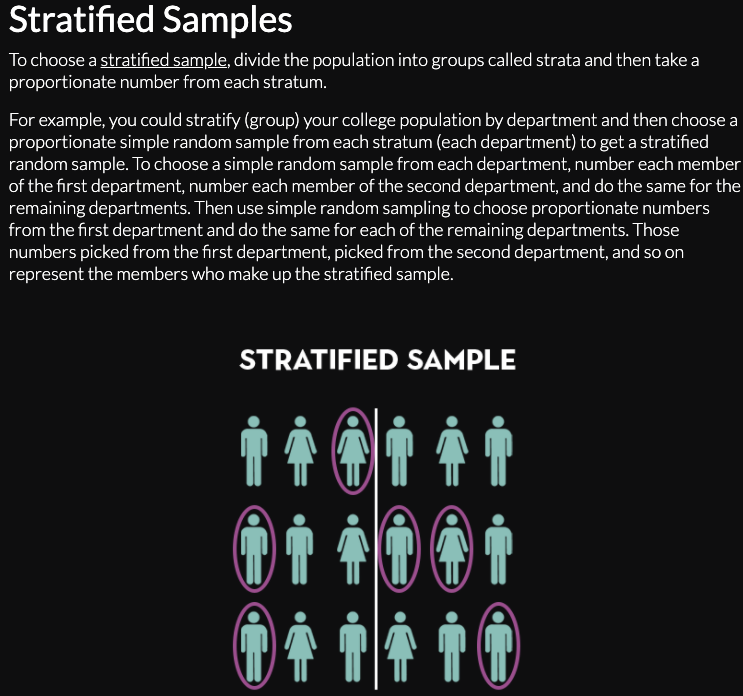

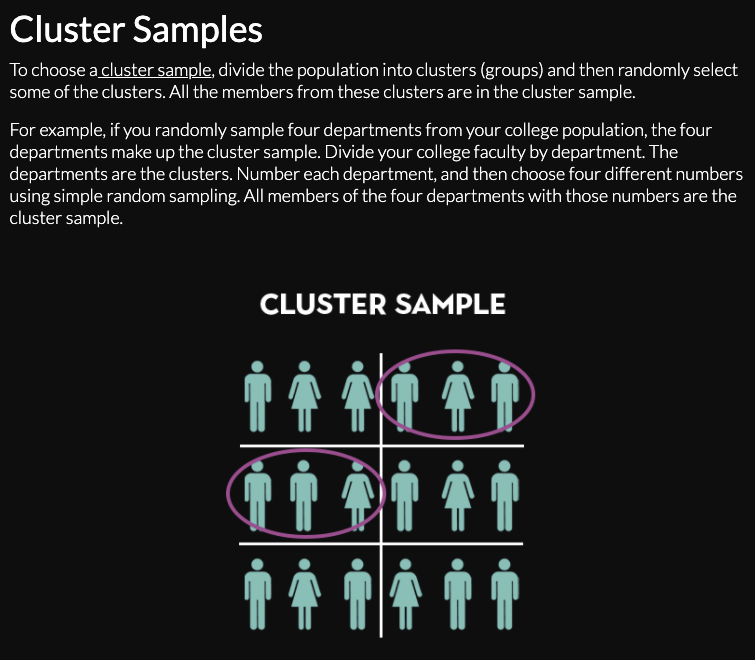

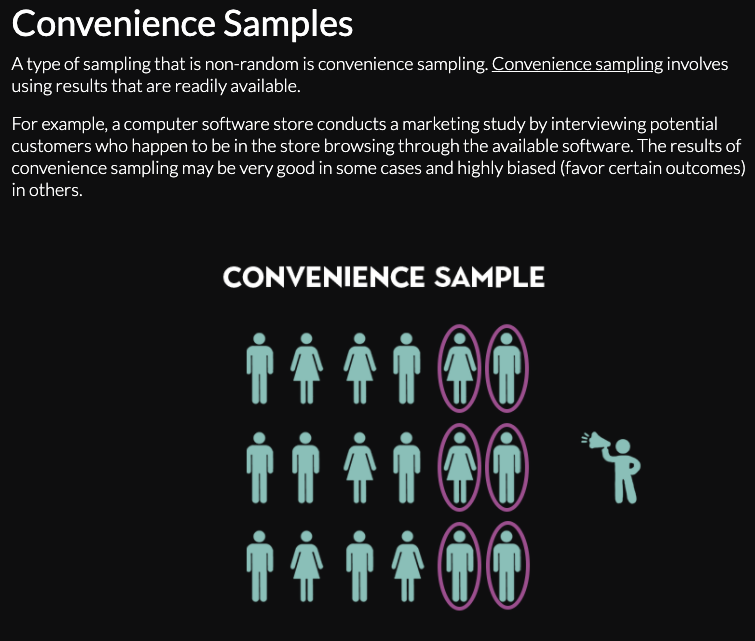

### Sampling with or without replacement

- **Sampling With and Without Replacement**
True random sampling is done with replacement; that is, once a member is picked, that member goes back into the population and thus may be chosen more than once. 

- **However for practical reasons, in most populations, simple random sampling is done without replacement;** that is, a member of the population may be chosen only once. 
- Surveys are typically done without replacement. Most samples are taken from large populations, and the sample tends to be small in comparison to the population. As a result, sampling without replacement is approximately the same as sampling with replacement, because the chance of picking the same individual more than once with replacement is very low.

### Statistical process
1. **Identify the question**
  - eg "Does going  sleep before 11 pm makes me more productive the next day"
2. **Collect the data**
  1. Can I use the data that already exists?
  1. Do I need to collect the data myself?
  1. Is the data source reliable?
3. **Analyse the data**
  1. How should I graph and explore the data?
  1. What statistical method is appropriate?
4. **Draw conclusions**
  1. Do my results have statistical significance?
  1. How can I accurately report my findings?



### Statistics and Parameters

Statistic - Using sample data, we can calculate a statistic, which is a number that represents a property of the sample. The statistic is an estimate of a population parameter. 

Parameter - is a numerical characteristic of the whole population that can be estimated by a statistic. If we consider all math classes to be population, then the average number of points earned per student over all the math classes is an example of a parameter.

A **p**arameter describes a **p**opulation and a **s**tatistic describes a **s**ample.

A parameter is a number that is used to represent a population characteristic and that generally cannot be determined easily.
A statistic is a numerical characteristic of the sample; it estimates the corresponding population parameter.

### Representative Samples

One of the main concerns in the field of statistics is how accurately a statistic estimates a parameter. The accuracy depends on how well the sample represents the population. The sample must contain the characteristics of the population to be a representative sample. In inferential statistics we use sample statistic to test the validity of the established population parameter.

### Numerical vs Categorical data
Categorical variables place the person or thing into a category. 
categorical
 variables are variables that take on values that are names or labels.
numerical
 variables are variables that take on values that are indicated by numbers.

We could do some math with values of  (calculate the average number of points earned, for example), but it makes no sense to do math with values of  (calculating an average party affiliation makes no sense).


The variable could be the amount of money spent (excluding books) by one first-year student. Let X = the amount of money spent (excluding books) by one first-year student attending ABC College.

### Discrete or Continuous data

**Discrete data** - All data that are the result of counting are called quantitative discrete data. These data take on only certain numerical values. 
If you count the number of phone calls you receive for each day of the week, you might get values such as zero, one, two, or three.

**Continuous data** - Data that are not only made up of counting numbers, but that may include fractions, decimals, or irrational numbers, are called quantitative continuous data. Continuous data are often the result of measurements like lengths, weights, or times. 

A list of the lengths in minutes for all the phone calls that you make in a week, with numbers like 2.4, 7.5, or 11.0, would be quantitative continuous data. For example square areas of apartments like (1109 sqft, about 103 square meters)

### Missing data

1. **Values missing at random**

- just as likely missing as any other value (pollster mistake forgetting ask to question one of the people, or maybe when entering data to excel skip one cell and leave it blank)


2. **Missing not at random**
- there is some reason why value is missing (some connection between missing values)
- people with lower income might not respond to question about income because they find it intrusive
- or pollsters have some bias


question: think about why that value is missing, is there a deeper reason


#### How to deal with missing values ?

1. If at random , its usually ok to delete the entries that have missing values.
2. If they are connected in some way then deleting them could end up in skewed results
  - we could come up with appriopriate value to replace missing values (imputting ), one of them is regression.






### What is simple random sample?


A simple random sample (gold standard) of n subjects - every sample of the same size n has the same chance of being selected. For example any combination of 66 men and woman has exact same chance of being selected.



### What is sampling bias?

In statistics, a sampling bias is created when a sample is collected from a population, and some members of the population are not as likely to be chosen as others (remember, each member of the population should have an equally likely chance of being chosen). When a sampling bias happens, incorrect conclusions can be drawn about the population that is being studied.

 

### Is it "good enough" to take a sample, instead of surveying the entire population?


- If the survey is done well, the answer is yes.

**example**: Manufacturers regularly run tests to determine if the amount of beverage in a 16-ounce can falls within the desired range.

**check**: Is this sample likely to be representative of (or is characteristic of) the entire population?

### What is a good enough size of sample for polling ?

- The size of a sample (often called the number of observations) is important. - Samples of only a few hundred observations, or even smaller, are sufficient for many purposes. In polling, samples that are from 1,200 to 1,500 observations are considered large enough and good enough if the survey is random and is well done.
- You will learn why these specific sample sizes are sufficiently large when you study confidence intervals. 
- Be aware that many large samples are biased. For example, call-in surveys are invariably biased, because people can opt not to respond.

### What are ways that sample could have errors?

- not sufficient size of sample (even when using random sampling methods) 
- measurement errors ( defective counting device for example, this is example of non sampling error)
- not representative sample (some group/s are over or under misrepresented)
- as a rule the smaller the sample the larger the sampling error

### Why are call-in surveys biased?

Because people can opt not to respond. Call-in "polls" are unscientific method where TV hosts can get a sense of public opinion by providing two numbers (for example one for yes and one for no).
There are multiple problems with it, for example people self select in terms of who responds.

### Why sampling with replacement is important?

Its because every time we pick a piece out the sample looks less and less like original, it gets smaller. Excluding examples we already seen will skew the distribution further and further each time we attempt to sample data.However but putting those pieces back means we can preserve the distribution of the original data sample, which means every time we reach in it , it is intact and looks how it should look like originally.

https://opendatascience.com/dewey-defeats-truman-how-sampling-bias-can-ruin-your-model/


This is pretty counter intuitive because for example if we would call the same person in the poll randomly, we would need to count its vote twice (to truly preserve randomness in the data sample), even though in real population he could not vote twice. 

**Sampling bias will ruin your model, and you’ll pay the cost for it if you decide to train on a biased data set. Make sure you don’t fall into this trap when you’re working on your next project.**

## Experimental design

   ### What are important aspects of good experimental design?
   1. Randomization
   1. Replication
   1. Blinding

### What is an experiment?
In an experiment, we impose some change on the subject. In an observational study, we observe without intervention.

### What is explanatory and response variable ?

- The purpose of the experiment is to investigate relationship between the variables.
1. **Explanatory Variable**
  - When one variable causes change in the other one, we call that variable `explanatory variable`.  
  - An explanatory variable is the `independent` variable in an experiment; it is the value controlled by researchers.
2. **Response Variable**
  - The affected variable is called the `response variable`. In a randomized experiment the researcher manipulates  values of explanatory variable and measures the resulting changes in the response variable.
  - A response variable is the `dependent` variable in an experiment; it is the value that is measured for change at the end of an experiment.




### What is treatment?

Different values of the explanatory variable are called treatments. 

Example: Different colours of the button shown to the users.

### What is an experimental unit?

Experimental unit is a single object or individual measured. 

Example: Single user of a mobile game, exposed to experiment.

### Example of experiment (aspirin and heart attack)

>Researchers want to investigate whether taking aspirin regularly reduces the risk of heart attack. Four hundred men between the ages of 50 and 84 are recruited as participants. The men are divided randomly into two groups: one group to take aspirin, and the other group to take placebo. Each man takes one pill each day for three years, but he does not know whether he is taking aspirin or the placebo. At the end of the study, researchers count the number of men in each group who have heart attacks.

| concept              | answer                               |
|----------------------|--------------------------------------|
| Sample               | 400 men who participated             |
| Population           | men aged 50 to 84                    |
| Experimental units   | individual men in the study          |
| Explanatory variable | oral medication                      |
| Treatments           | aspirin and placebo                  |
| Response variable    | whether a subject had a heart attack |

### How to prove cause-and-effect connection between the explanatory and response variables?

- experiment need to be designed in such way that there is only one difference between groups being compared (the planned treatments)
- isolating explanatory variable can be accomplished by random assignment of experimental units to treatment groups
- when subjects are assigned treatments randomly then all potential lurking variables are spread equally among the groups
- this way the only difference between he groups should be the one imposed by the researcher, therefore different outcomes measured in the response variabe must be direct result of the different treatments

### What is lurking variable and how it can cloud the study?

- Lurking variable are other things that might affect response variable.
- For example if we are measuring effects on health then the participants from group A (that take vitamin E) also have a healthier lifestyle than group B (which does not take vitamin E) like for example choose not to smoke, eat healthier, exercise etc. then any of those additional things could impact make response variable of state of health better (not the Vitamin E).
- To prove that explanatory variable is causing a change in the response variable, we must isolate the explanatory variable.


### What is the difference between lurking and confounding variable ?

1. `Lurking Variable` -  variable that has an important effect on the relationship among the variables in the study, but is not one of the explanatory variables studied.

2. `Confounding` - Two variables are confounded when their effects on a
response variable cannot be distinguished from each other.
  - The confounded variables may be either explanatory variables
or lurking variables.
  - In a comparative design, confounding occurs when the two
  groups differ by some variable (other than the treatment) that
  influences the response being studied.

### What is replication in experimental design?

Replication involves the repetition of an experimental condition in order to observe the effects on a wide range of subjects.  Replication takes into account the variation between the subjects, reducing sampling error and bias.

### What is a placebo effect (example)?

- The power of suggestion can have an important influence on the outcome of an experiment. Studies have shown that the expectation of the study participant can be as important as the actual medication.
- In one study of performance-enhancing drugs, researchers noted:
  Results showed that believing one had taken the substance resulted in [performance] times almost as fast as those associated with consuming the drug itself. In contrast, taking the drug without knowledge yielded no significant performance increment. (McClung & Collins, 2007)
  McClung, M., Collins, D. (2007). “Because I know it will!”: Placebo Effects of an Ergogenic Aid on Athletic Performance. Journal of Sport & Exercise Psychology, 29(3), 382-94. https://doi.org/10.1123/jsep.29.3.382

### How can we counter the power of suggestion?

- When participation in a study prompts a physical response from a participant, it is difficult to isolate the effects of the explanatory variable. 
- To counter the power of suggestion, researchers set aside one treatment group as a control group.
- This group is given a placebo treatment, a treatment that cannot influence the response variable.
- The control group helps researchers balance the effects of being in an experiment with the effects of the active treatments. 

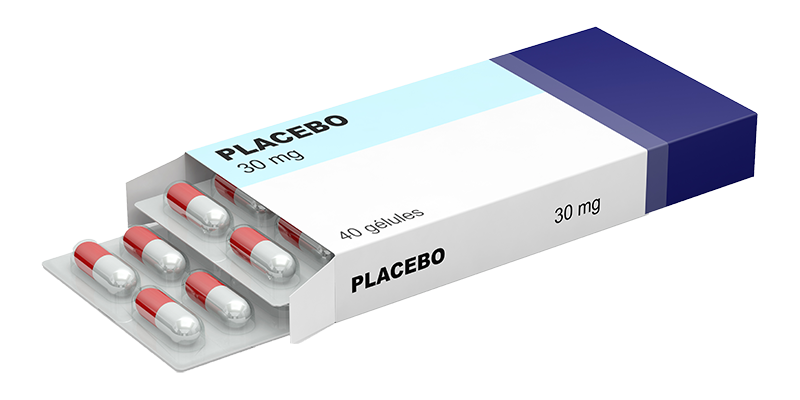

### What is blinding in experiment?


Blinding in a randomized experiment prevents the power of suggestion. When a person involved in a research study is blinded, he does not know who is receiving the active treatment(s) and who is receiving the placebo treatment. A double-blind experiment is one in which both the subjects and the researchers involved with the subjects are blinded.

### Example of experimental design (impact of scent on learning)

>The Smell & Taste Treatment and Research Foundation conducted a study to investigate whether smell can affect learning. Subjects completed mazes multiple times while wearing masks. They completed the pencil and paper mazes three times wearing floral-scented masks, and three times with unscented masks. Participants were assigned at random to wear the floral mask during the first three trials or last three trials. For each trial, researchers recorded the time it took to complete the maze and the subject's impression of the mask's scent: positive, negative, or neutral.

| concept              | answer                                                                                                                                                                                                                       |
|----------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Explanatory variable | scent                                                                                                                                                                                                                        |
| Response variable    | time it takes to complete the maze                                                                                                                                                                                           |
| Treatments           | two treatments: floral-scented mask and an unscented mask                                                                                                                                                                    |
| Lurking variables    | All subjects experienced both treatments. The order of treatments was randomly assigned so there were no differences between the treatment groups. Random assignment eliminates the problem of lurking variables.            |
| Blinding             | No, subjects could not be blinded in this study, they could clearly smell whether the mask was floral scented or not. However the researchers could be blinded, because they would not know which mask a subject is wearing. |



### What are the common problems with studies?


1. **Not representative samples** : A sample must be representative of the population. A sample that is not representative of the population is biased. Biased samples that are not representative of the population give results that are inaccurate and not valid.
1. **Self-selected samples**: Responses only by people who choose to respond, such as call-in surveys, are often unreliable.

1. **Sample size issues** : Samples that are too small may be unreliable. Larger samples are better, whenever possible. In some situations, having small samples is unavoidable and can still be used to draw conclusions (examples: crash testing cars or medical testing for rare conditions).
1. **Undue influence**: Collecting data or asking questions in a way that influences the response is likely to lead to inaccurate and invalid results.
1. **Non-response or refusal of subject to participate**: The collected responses may no longer be representative of the population. Often, people with strong positive or negative opinions may answer surveys, which can affect the results.
1. **Causality** : A relationship between two variables does not mean that one causes the other to occur. They may be related (correlated) because of their relationship through a different variable.
1. **Self-funded or self-interest studies**: A study performed by a person or organization in order to support their claim. Is the study impartial? Read the study carefully to evaluate the work. Do not automatically assume that the study is good, but do not automatically assume the study is bad either. Evaluate it on its merits and the work done.
1. **Misleading use of data**: Improperly displayed graphs, incomplete data, or lack of context.
1. **Confounding**:  When the effects of multiple factors on a response cannot be separated.  Confounding makes it difficult or impossible to draw valid conclusions about the effect of each factor.


### How prevalent is fraud in statistical studies?

It is important that students of statistics take time to consider the ethical questions that arise in statistical studies. How prevalent is fraud in statistical studies? You might be surprised—and disappointed. There is a website dedicated to cataloging retractions of study articles that have been proven fraudulent. A quick glance shows that the misuse of statistics is a bigger problem than most people realize.

https://retractionwatch.com/

### How to assess if the research is valid?

When you encounter statistics, ask yourself:
1. Agenda - **Who is reporting this information?** Do they have conflicts of interest? Who funds the research?
1. Sample - Is the **sample large and unbiased**?
1. Assumptions and Review - Do the researchers provide complete details about their methods and assumptions? Is the research peer reviewed?
1. Availability of source data - Are the sources for the statistics readily available and transparent? If not, that might be a problem.

### What are the guidelines for conducting ethical analysis ?

1. Report your complete results, even if they are undesirable.
1. Report your methods and assumptions completely, not just the end result.
1. Disclose any potential conflicts of interest.
1. Collaborate with peers and subject matter experts. Be sure to give credit to anyone who contributes.
1. When in doubt, follow this rule of thumb: If something feels sketchy, it probably is. Don’t be afraid to speak up!
1. Hold yourself and others accountable. Before you share statistics, make sure they are reliable. Don’t spread unethical or untrue information.

## References

[0] [openstax - Introductory Statistics](https://openstax.org/books/introductory-statistics/pages/1-introduction)     
[1] Warren Weaver, Lady Luck - The Theory of Probability (1963).  
[2] [Outlier - Intro to Statistics](https://www.outlier.org/products/intro-to-statistics).  
[3] Probability for Machine Learning, Jason Brownlee.   
[4] Head First Statistics, Dawn Griffiths.  
[5] All of Statistics, Larry Wasserman.  
[6] [A Gentle Introduction to Joint, Marginal, and Conditional Probability](https://machinelearningmastery.com/joint-marginal-and-conditional-probability-for-machine-learning/#).  
[7] [Machine Learning Yearning](https://www.deeplearning.ai/programs/), Andrew Ng

[8] [Probability as the logic of science](https://bebi103b.github.io/lessons/01/bayes_logic.html)